# [Personal Project]

> ## * Subject:   SALARY PREDICTION of Players who sign a FA Contract
>
> ## * Content:
>    * The goal of this project is to predict the 2018 FA Salaries of qualified players in 2018 based on many data that analized stats of players in the past. (Based on the FA results from 2006 to 2017)
>
>    * The 2018 FA Salaries are predicted by 2017 stats(2017.04 ~ 2017.10)

In [1]:
from sklearn.preprocessing import normalize, LabelEncoder
from patsy import dmatrix
from sklearn.linear_model import LinearRegression, LassoCV, LassoLarsCV, RidgeCV, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import cross_validation
from sklearn.metrics import explained_variance_score, mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import xgboost as xgb
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../dataset/mlb_fa_list2.csv')

print(df.shape)
df.tail()

(1225, 72)


,Name,Yr,Team,G,AB,PA,H_b,1B,2B,3B,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB%,K%,BB/K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC+,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR/9,BB/9,K/9,K/BB,K-BB%,GB%,HR/FB,LOB%,ERA,BABIP_p,FIP,WHIP,Contract Yrs,Total Salary($),Avg Salary($)
1220,Trevor Plouffe,2016,Twins,84,319.0,344.0,83.0,57.0,13.0,1.0,12.0,35.0,47.0,19.0,0.0,60.0,5.5,17.4,0.32,0.284,2.0,3.0,1.0,11.0,1.0,0.0,-8.4,0.160,0.311,-2.1,0.260,0.303,0.420,0.723,-0.4,91.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,1.0,5250000.0,5250000.0
1221,Tyson Ross,2016,Padres,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.1,0.0,-0.24,0.0,1.0,1.0,0.0,5.1,9.0,0.0,1.0,5.0,8.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,27.0,1.0,0.0,1.69,8.44,5.0,14.8,47.4,0.0,33.3,11.81,0.474,2.96,1.88,1.0,6000000.0,6000000.0
1222,Welington Castillo,2016,Diamondbacks,113,416.0,457.0,110.0,72.0,24.0,0.0,14.0,41.0,68.0,33.0,3.0,121.0,7.2,26.5,0.27,0.337,4.0,4.0,0.0,5.0,2.0,0.0,9.8,0.159,0.319,0.4,0.264,0.322,0.423,0.745,1.6,91.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,13000000.0,6500000.0
1223,Wilson Ramos,2016,Nationals,131,482.0,523.0,148.0,101.0,25.0,0.0,22.0,58.0,80.0,35.0,2.0,79.0,6.7,15.1,0.44,0.327,2.0,4.0,0.0,17.0,0.0,0.0,8.4,0.189,0.361,18.7,0.307,0.354,0.496,0.850,3.4,124.0,2.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,12500000.0,6250000.0
1224,Yoenis Cespedes,2016,Mets,132,479.0,543.0,134.0,77.0,25.0,1.0,31.0,72.0,86.0,51.0,8.0,108.0,9.4,19.9,0.47,0.298,7.0,6.0,0.0,14.0,3.0,1.0,-9.2,0.251,0.369,22.8,0.280,0.354,0.530,0.884,3.2,135.0,3.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,4.0,110000000.0,27500000.0


In [4]:
df.rename(columns={"wRC+": "wRC_Plus", "Contract Yrs" : "Contract_Yrs"}, inplace=True)
df.rename(columns={"BB%": "BB_Percent", "K%": "K_Percent", "K-BB%": "K_BB_Percent", "GB%": "GB_Percent",
                   "LOB%": "LOB_Percent"}, inplace=True)
df.rename(columns={"Avg Salary($)": "Salary", "Total Salary($)" : "Total_Salary"}, inplace=True)
df.rename(columns={"1B" : "Hits", "2B" : "Doubles", "3B" : "Triples"}, inplace=True)
df.rename(columns={"BB/K" : "BB_per_K", "HR/9" : "HR_per_9", "BB/9" : "BB_per_9", "K/9" : "K_per_9", "K/BB" : "K_per_BB",
                   "HR/FB" : "HR_per_FB"}, inplace=True)

df.tail()

,Name,Yr,Team,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP,Contract_Yrs,Total_Salary,Salary
1220,Trevor Plouffe,2016,Twins,84,319.0,344.0,83.0,57.0,13.0,1.0,12.0,35.0,47.0,19.0,0.0,60.0,5.5,17.4,0.32,0.284,2.0,3.0,1.0,11.0,1.0,0.0,-8.4,0.160,0.311,-2.1,0.260,0.303,0.420,0.723,-0.4,91.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,1.0,5250000.0,5250000.0
1221,Tyson Ross,2016,Padres,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.1,0.0,-0.24,0.0,1.0,1.0,0.0,5.1,9.0,0.0,1.0,5.0,8.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,27.0,1.0,0.0,1.69,8.44,5.0,14.8,47.4,0.0,33.3,11.81,0.474,2.96,1.88,1.0,6000000.0,6000000.0
1222,Welington Castillo,2016,Diamondbacks,113,416.0,457.0,110.0,72.0,24.0,0.0,14.0,41.0,68.0,33.0,3.0,121.0,7.2,26.5,0.27,0.337,4.0,4.0,0.0,5.0,2.0,0.0,9.8,0.159,0.319,0.4,0.264,0.322,0.423,0.745,1.6,91.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,13000000.0,6500000.0
1223,Wilson Ramos,2016,Nationals,131,482.0,523.0,148.0,101.0,25.0,0.0,22.0,58.0,80.0,35.0,2.0,79.0,6.7,15.1,0.44,0.327,2.0,4.0,0.0,17.0,0.0,0.0,8.4,0.189,0.361,18.7,0.307,0.354,0.496,0.850,3.4,124.0,2.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,12500000.0,6250000.0
1224,Yoenis Cespedes,2016,Mets,132,479.0,543.0,134.0,77.0,25.0,1.0,31.0,72.0,86.0,51.0,8.0,108.0,9.4,19.9,0.47,0.298,7.0,6.0,0.0,14.0,3.0,1.0,-9.2,0.251,0.369,22.8,0.280,0.354,0.530,0.884,3.2,135.0,3.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,4.0,110000000.0,27500000.0


In [5]:
df.dtypes

Name             object
Yr                int64
Team             object
G                 int64
AB              float64
PA              float64
H_b             float64
Hits            float64
Doubles         float64
Triples         float64
HR_b            float64
R_b             float64
RBI             float64
BB_b            float64
IBB_b           float64
SO_b            float64
BB_Percent      float64
K_Percent       float64
BB_per_K        float64
BABIP_b         float64
HBP_b           float64
SF              float64
SH              float64
GDP             float64
SB              float64
CS              float64
Def             float64
ISO             float64
wOBA            float64
wRAA            float64
AVG             float64
OBP             float64
SLG             float64
OPS             float64
WAR             float64
wRC_Plus        float64
WPA             float64
W               float64
L               float64
GS              float64
CG              float64
IP              

In [6]:
## 각 변수별 기초통계량 확인

df.describe()

,Yr,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP,Contract_Yrs,Total_Salary,Salary
count,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.00000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.00000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.00000,1225.000000,1225.000000,1225.000000,1225.00000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1.225000e+03,1.225000e+03
mean,2010.713469,78.243265,189.861224,212.893061,49.512653,32.977143,9.815510,0.844082,5.88000,24.641633,24.104490,18.352653,1.332245,37.863673,4.477714,10.136816,0.266882,0.156652,1.991837,1.582041,1.07102,4.404082,2.777959,1.071837,-0.564163,0.078505,0.169473,0.764490,0.136124,0.172531,0.214606,0.387136,1.038367,50.057143,0.06382,2.506122,2.524082,4.735510,0.12000,43.304490,43.427755,4.830204,14.325714,33.914286,21.238367,1.881633,0.753469,0.141224,19.537959,1.524898,2.573878,1.154286,0.058776,185.241633,1.428571,0.477167,1.539192,3.540939,1.259412,5.298612,21.200163,4.958041,35.389469,1.950302,0.141492,1.962767,0.646392,1.665306,1.305786e+07,4.817255e+06
std,3.373100,44.031142,210.794712,236.325069,57.347995,38.905086,11.791777,1.735166,8.66145,29.706595,29.899022,23.448624,2.799069,44.552864,4.822388,10.684621,0.302980,0.147938,3.232029,2.237165,2.35439,5.722689,6.594809,2.117018,6.452877,0.085018,0.160529,8.998061,0.129135,0.163066,0.206868,0.368163,1.426539,50.931920,1.42512,3.986723,3.887673,10.266319,0.50436,61.513315,63.559592,7.455460,20.085012,47.451661,31.547433,6.933734,1.700526,0.471897,29.049801,2.531419,5.784358,1.847503,0.279718,261.903437,2.373946,0.599201,1.810092,3.947500,1.592168,6.994647,22.839611,6.072583,37.229548,2.297854,0.149470,2.147532,0.693953,1.284897,2.933066e+07,5.015766e+06
min,2005.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-44.800000,0.000000,0.000000,-32.100000,0.000000,0.000000,0.000000,0.000000,-2.300000,-7.000000,-3.68000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.800000e+05,3.800000e+05
25%,2009.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.200000,0.000000,0.000000,-1.100000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,-0.87000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.400000e+06,1.350000e+06
50%,2011.000000,69.000000,115.000000,127.000000,27.000000,17.000000,4.000000,0.000000,1.00000,11.000000,10.000000,7.000000,0.000000,24.000000,3.90

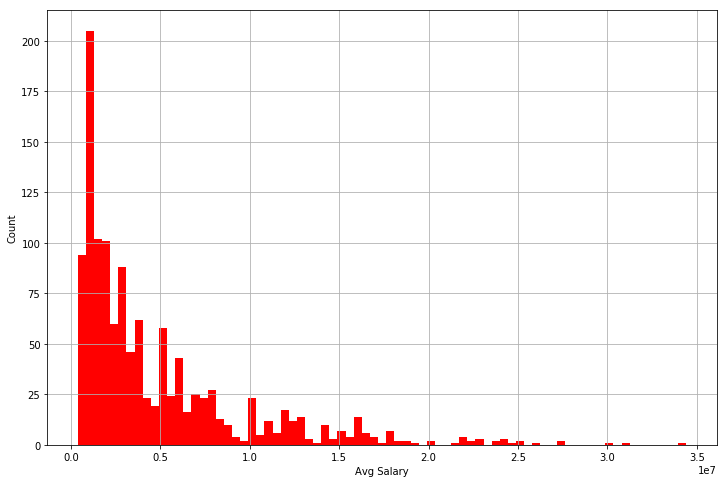

In [7]:
## Check distribution by Salary

plt.figure(figsize=(12, 8))
plt.hist(df['Salary'], bins=75, color='r')
plt.xlabel('Avg Salary')
plt.ylabel('Count')
plt.grid()
plt.show()

In [8]:
## Grasping the number of players who sign a FA contract by year

df.groupby('Yr').count()['Name']

Yr
2005    109
2006     81
2007     91
2009    215
2010     91
2011     88
2012    117
2013    120
2014    105
2015    119
2016     89
Name: Name, dtype: int64

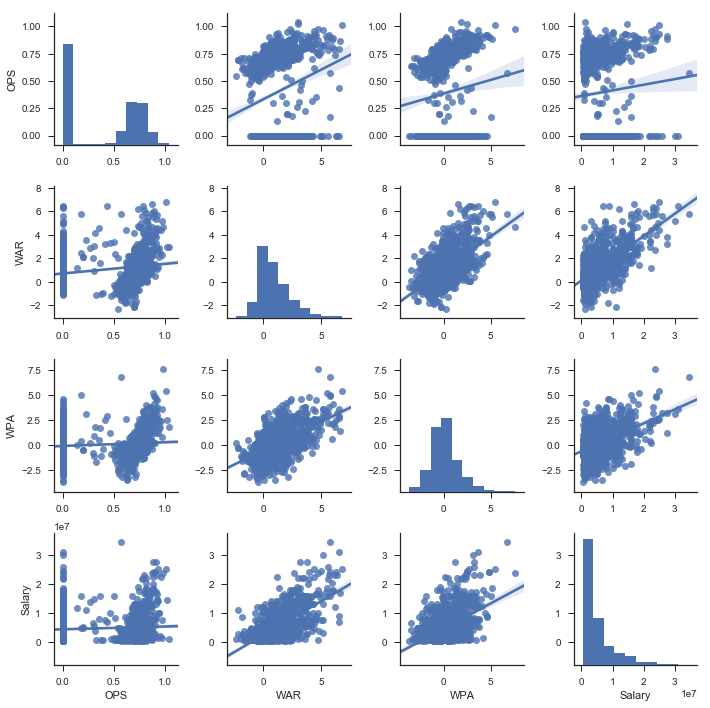

In [9]:
## Check the relationship between 'Salary' and the major indicators chosen among the various performance indicators by pairplot.

cols = ["OPS", "WAR", "WPA", "Salary"]
sns.set(style="ticks")
g = sns.pairplot(df[cols], kind="reg")

In [10]:
## Encoding Two Categorical Columns

def encode_df_x1(df):
    
    ## categorical variables of Yr
    df_yr_le = LabelEncoder()
    df['Yr'] = df_yr_le.fit_transform(df['Yr'])
    
    enc_dict_yr = {'Yr' : df_yr_le}
    
    return df, enc_dict_yr
    
def encode_df_x2(df):
    
    ## categorical variables of Team
    df_team_le = LabelEncoder()
    df['Team'] = df_team_le.fit_transform(df['Team'])
    
    enc_dict_team = {'Team' : df_team_le}
    
    return df, enc_dict_team

train_df_x1 = encode_df_x1(df)
train_df_x2 = encode_df_x2(df)

In [12]:
df.tail()

,Name,Yr,Team,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP,Contract_Yrs,Total_Salary,Salary
1220,Trevor Plouffe,10,29,84,319.0,344.0,83.0,57.0,13.0,1.0,12.0,35.0,47.0,19.0,0.0,60.0,5.5,17.4,0.32,0.284,2.0,3.0,1.0,11.0,1.0,0.0,-8.4,0.160,0.311,-2.1,0.260,0.303,0.420,0.723,-0.4,91.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,1.0,5250000.0,5250000.0
1221,Tyson Ross,10,19,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.1,0.0,-0.24,0.0,1.0,1.0,0.0,5.1,9.0,0.0,1.0,5.0,8.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,27.0,1.0,0.0,1.69,8.44,5.0,14.8,47.4,0.0,33.3,11.81,0.474,2.96,1.88,1.0,6000000.0,6000000.0
1222,Welington Castillo,10,10,113,416.0,457.0,110.0,72.0,24.0,0.0,14.0,41.0,68.0,33.0,3.0,121.0,7.2,26.5,0.27,0.337,4.0,4.0,0.0,5.0,2.0,0.0,9.8,0.159,0.319,0.4,0.264,0.322,0.423,0.745,1.6,91.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,13000000.0,6500000.0
1223,Wilson Ramos,10,17,131,482.0,523.0,148.0,101.0,25.0,0.0,22.0,58.0,80.0,35.0,2.0,79.0,6.7,15.1,0.44,0.327,2.0,4.0,0.0,17.0,0.0,0.0,8.4,0.189,0.361,18.7,0.307,0.354,0.496,0.850,3.4,124.0,2.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,12500000.0,6250000.0
1224,Yoenis Cespedes,10,16,132,479.0,543.0,134.0,77.0,25.0,1.0,31.0,72.0,86.0,51.0,8.0,108.0,9.4,19.9,0.47,0.298,7.0,6.0,0.0,14.0,3.0,1.0,-9.2,0.251,0.369,22.8,0.280,0.354,0.530,0.884,3.2,135.0,3.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,4.0,110000000.0,27500000.0


## * Splitting Dependent & Independent Variables

In [13]:
df_x = df.iloc[:, 1:69]

In [14]:
print(df_x.shape)
df_x.tail()

(1225, 68)


,Yr,Team,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP
1220,10,29,84,319.0,344.0,83.0,57.0,13.0,1.0,12.0,35.0,47.0,19.0,0.0,60.0,5.5,17.4,0.32,0.284,2.0,3.0,1.0,11.0,1.0,0.0,-8.4,0.160,0.311,-2.1,0.260,0.303,0.420,0.723,-0.4,91.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1221,10,19,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.1,0.0,-0.24,0.0,1.0,1.0,0.0,5.1,9.0,0.0,1.0,5.0,8.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,27.0,1.0,0.0,1.69,8.44,5.0,14.8,47.4,0.0,33.3,11.81,0.474,2.96,1.88
1222,10,10,113,416.0,457.0,110.0,72.0,24.0,0.0,14.0,41.0,68.0,33.0,3.0,121.0,7.2,26.5,0.27,0.337,4.0,4.0,0.0,5.0,2.0,0.0,9.8,0.159,0.319,0.4,0.264,0.322,0.423,0.745,1.6,91.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1223,10,17,131,482.0,523.0,148.0,101.0,25.0,0.0,22.0,58.0,80.0,35.0,2.0,79.0,6.7,15.1,0.44,0.327,2.0,4.0,0.0,17.0,0.0,0.0,8.4,0.189,0.361,18.7,0.307,0.354,0.496,0.850,3.4,124.0,2.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1224,10,16,132,479.0,543.0,134.0,77.0,25.0,1.0,31.0,72.0,86.0,51.0,8.0,108.0,9.4,19.9,0.47,0.298,7.0,6.0,0.0,14.0,3.0,1.0,-9.2,0.251,0.369,22.8,0.280,0.354,0.530,0.884,3.2,135.0,3.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00


In [15]:
df_y = pd.DataFrame(df['Salary'])

print(df_y.shape)
df_y.tail()

(1225, 1)


,Salary
1220,5250000.0
1221,6000000.0
1222,6500000.0
1223,6250000.0
1224,27500000.0


In [16]:
df_x_corr = df_x.corr()
df_x_corr.tail()

,Yr,Team,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP
LOB_Percent,0.085814,-0.004271,-0.737424,-0.834416,-0.833830,-0.805638,-0.792231,-0.771840,-0.454795,-0.634219,-0.772804,-0.752884,-0.728583,-0.448724,-0.776992,-0.854971,-0.794930,-0.818162,-0.946350,-0.578303,-0.661015,-0.297222,-0.726020,-0.388487,-0.467588,0.137568,-0.846597,-0.957012,-0.078496,-0.952412,-0.958676,-0.942325,-0.954100,-0.072538,-0.914442,0.070023,0.641647,0.632923,0.446973,0.234548,0.711523,0.678969,0.648604,0.716588,0.734023,0.654048,0.311100,0.477719,0.298027,0.653851,0.603393,0.484843,0.636549,0.207372,0.711619,0.601151,0.808438,0.864167,0.939932,0.838623,0.816765,0.948500,0.834466,1.000000,0.814397,0.959080,0.924049,0.935527
ERA,0.045769,0.042912,-0.725933,-0.748055,-0.747715,-0.721790,-0.709549,-0.692196,-0.406944,-0.568412,-0.693166,-0.674748,-0.653501,-0.402022,-0.697168,-0.766132,-0.717353,-0.732783,-0.850102,-0.517558,-0.594719,-0.281065,-0.648758,-0.350253,-0.421636,0.115827,-0.759446,-0.858991,-0.071011,-0.855103,-0.860445,-0.845780,-0.856345,-0.151375,-0.819478,-0.168257,0.549611,0.671602,0.480246,0.216034,0.644028,0.667956,0.659471,0.690091,0.618575,0.707067,0.154051,0.339133,0.302377,0.711192,0.590654,0.295164,0.559294,0.193712,0.660405,0.577670,0.863548,0.856750,0.769830,0.621890,0.548276,0.851208,0.846040,0.814397,1.000000,0.915802,0.938334,0.949867
BABIP_p,0.087114,0.016844,-0.761655,-0.835046,-0.834625,-0.805748,-0.791750,-0.773324,-0.455416,-0.634966,-0.773858,-0.753235,-0.730240,-0.448738,-0.778565,-0.855142,-0.796807,-0.817683,-0.946770,-0.577731,-0.662928,-0.303114,-0.723820,-0.391431,-0.471258,0.131785,-0.847632,-0.957507,-0.079166,-0.952791,-0.959002,-0.942993,-0.954620,-0.083970,-0.914440,-0.029563,0.633915,0.680384,0.484102,0.246698,0.719539,0.715664,0.661457,0.734542,0.727968,0.708771,0.252911,0.437705,0.308799,0.708692,0.620064,0.431702,0.643119,0.218322,0.727164,0.625481,0.810799,0.885860,0.916899,0.792705,0.756117,0.959269,0.835728,0.959080,0.915802,1.000000,0.939387,0.985329
FIP,0.039577,0.017976,-0.754958,-0.801940,-0.801461,-0.774317,-0.761633,-0.741426,-0.436225,-0.609394,-0.742985,-0.723700,-0.700035,-0.431525,-0.746347,-0.821583,-0.764727,-0.786441,-0.910081,-0.555665,-0.636904,-0.294577,-0.697865,-0.373688,-0.449755,0.130386,-0.813420,-0.920101,-0.075676,-0.915870,-0.921775,-0.905882,-0.917279,-0.160558,-0.878751,-0.088718,0.608529,0.681231,0.493524,0.226093,0.695648,0.696624,0.711109,0.739194,0.669342,0.714439,0.198138,0.394011,0.327762,0.715222,0.629403,0.367330,0.607533,0.202868,0.706576,0.598449,0.926025,0.899630,0.830026,0.681721,0.615929,0.907552,0.911050,0.924049,0.938334,0.939387,1.000000,0.969461
WHIP,0.060169,0.025404,-0.760090,-0.820380,-0.819959,-0.791651,-0.778235,-0.759091,-0.446694,-0.623450,-0.760014,-0.739980,-0.716656,-0.440867,-0.764588,-0.840378,-0.785601,-0.803753,-0.931809,-0.567642,-0.651367,-0.304416,-0.711951,-0.383589,-0.461698,0.129195,-0.832865,-0.941741,-0.077638,-0.937399,-0.943315,-0.927316,-0.938862,-0.130022,-0.898617,-0.079183,0.604623,0.674946,0.476605,0.224019,0.694741,0.699218,0.658478,0.745249,0.685620,0.707603,0.219841,0.416907,0.316231,0.707800,0.616268,0.399008,0.640536,0.198491,0.706926,0.621160,0.840173,0.929631,0.874621,0.707855,0.659440,0.943168,0.849520,0.935527,0.949867,0.985329,0.969461,1.000000


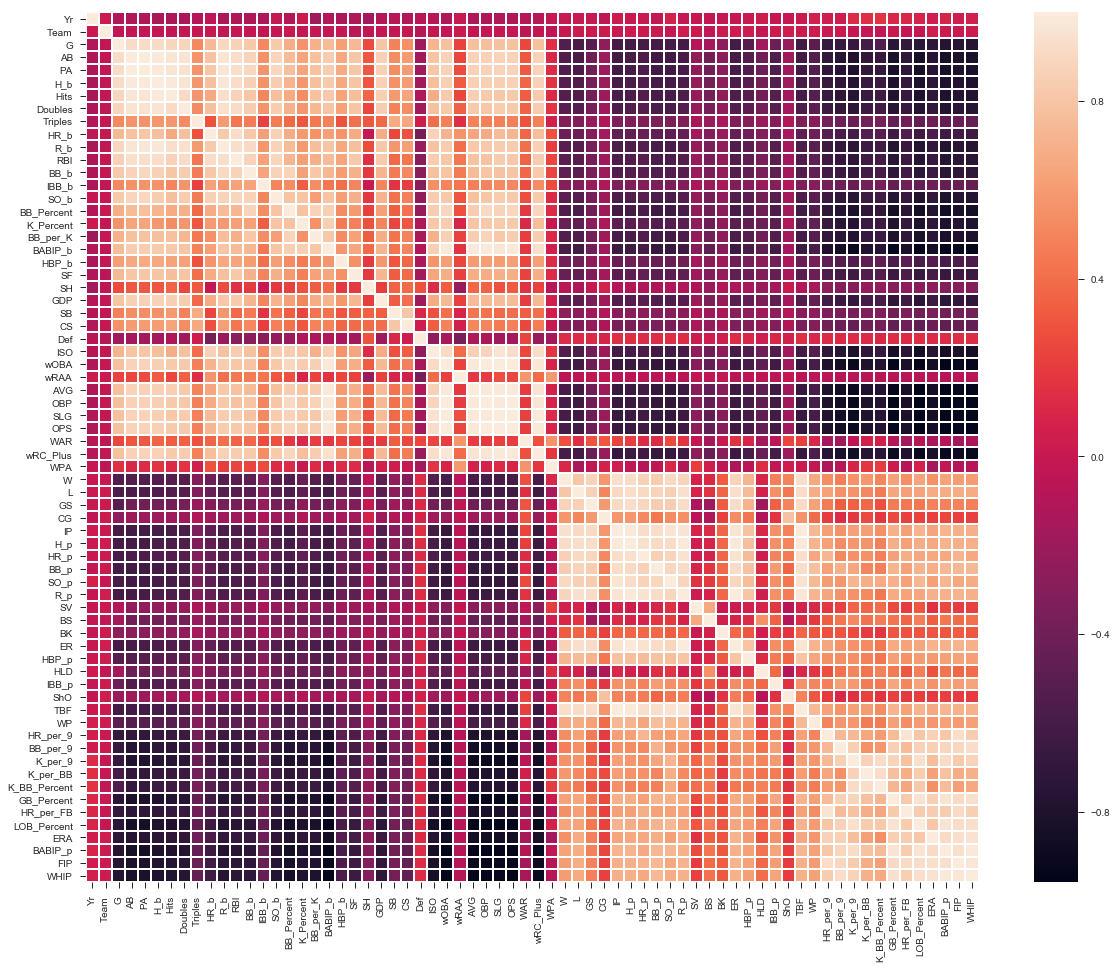

In [17]:
plt.figure(figsize=(20, 16))
corr_data = pd.DataFrame.corr(df_x)
sns.heatmap(corr_data, annot=False, linewidths=1)
plt.show()

## * Checking p-value using OLS Analysis

### * 1st OLS analysis

In [18]:
dfX1 = sm.add_constant(df_x)
dfY = pd.DataFrame(df_y, columns=["Salary"])
df_mlb = pd.concat([dfX1, dfY], axis=1)

In [19]:
model1 = sm.OLS(dfY, dfX1)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     35.35
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          4.86e-234
Time:                        01:00:58   Log-Likelihood:                -19948.
No. Observations:                1225   AIC:                         4.003e+04
Df Residuals:                    1156   BIC:                         4.039e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.958e+06   1.21e+06      4.083   

## * Scaling the variables

In [20]:
cols = df_x.columns.tolist()

cat_cols = cols[:2]
num_cols = cols[2:70]

cat_cols_list = []
num_cols_list = []

def r_style_cat_cols(convert1, convert2):
    for item1 in cat_cols:
        cat_cols_list.append("C(" + item1 + ")")
        
    for item2 in num_cols:
        num_cols_list.append("scale(" + item2 + ")")
        
    return cat_cols_list, num_cols_list

converted_cols = r_style_cat_cols(cat_cols, num_cols)

converted_cols_list = " + ".join(cat_cols_list + num_cols_list)
model_str = "Salary ~ "

## zero; To eliminate Intercept of Scaling categorical valiable.
zero = ' + 0'

ols_str_list = model_str + converted_cols_list + zero
merging_converted_cols = cat_cols_list + num_cols_list

# print(ols_str_list)
# print(converted_cols_list)
# print(converted_cols)

### * 2nd OLS analysis (Not include 'ZERO')

In [21]:
dfX2 = dmatrix(converted_cols_list, data=df_x)
dfX2_columns = dfX2.design_info.column_names
dfX2 = pd.DataFrame(dfX2, columns=dfX2_columns)

In [22]:
model2 = sm.OLS(dfY, dfX2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     23.71
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          5.67e-220
Time:                        01:01:50   Log-Likelihood:                -19911.
No. Observations:                1225   AIC:                         4.004e+04
Df Residuals:                    1117   BIC:                         4.059e+04
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             5.77e+06    

## * 1st Pre-processing Variables of model2 that failed the 5% P-VALUE Condition test

In [28]:
def extracted_pvals(result, cond):
    pvals = pd.DataFrame(result.pvalues)
    pvals.columns = ['P_values']
    pvals['P_values'] = pvals[pvals.P_values < cond]
    pvals = pvals.dropna().sort_values('P_values')
    
    return pvals

In [29]:
p_values3 = extracted_pvals(result2, 0.05)
# print(len(p_values))
# print(p_values)

extracted_features3 = list(p_values3.index.values)
extracted_df_x3 = dfX2.loc[:, extracted_features3]

extracted_df_x3.tail()

,scale(G),scale(SV),scale(IBB_b),scale(GDP),scale(SB),C(Yr)[T.10],scale(WAR),scale(wRAA),scale(SO_p),C(Yr)[T.9],scale(HR_p),scale(SLG)
1220,0.130796,-0.271484,-0.476154,1.153062,-0.269710,1.0,-1.008703,-0.318475,-0.715004,0.0,-0.648139,0.993282
1221,-1.755004,-0.271484,-0.476154,-0.769897,-0.421406,1.0,-0.658062,-0.084996,-0.609591,0.0,-0.648139,-1.037828
1222,0.789689,-0.271484,0.596068,0.104175,-0.118014,1.0,0.393864,-0.040524,-0.715004,0.0,-0.648139,1.007790
1223,1.198658,-0.271484,0.238661,2.201948,-0.421406,1.0,1.656174,1.994078,-0.715004,0.0,-0.648139,1.360816
1224,1.221379,-0.271484,2.383106,1.677505,0.033683,1.0,1.515917,2.449918,-0.715004,0.0,-0.648139,1.525240


### * 3-1 OLS analysis

In [30]:
dfX3_1 = sm.add_constant(extracted_df_x3)

model3_1 = sm.OLS(dfY, dfX3_1)
result3_1 = model3_1.fit()
print(result3_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     143.9
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          3.90e-223
Time:                        01:12:26   Log-Likelihood:                -20095.
No. Observations:                1225   AIC:                         4.022e+04
Df Residuals:                    1212   BIC:                         4.028e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.498e+06   1.02e+05     44.249   

## * 2nd Pre-processing Variables of model3-1 that failed the 1% P-VALUE Condition test

In [31]:
p_values3_1 = extracted_pvals(result3_1, 0.05)

extracted_features3_1 = p_values3_1.index.values
extracted_df_x3_1 = dfX3_1.loc[:, extracted_features3_1]

dfX3_1_1 = sm.add_constant(extracted_df_x3_1)

model3_1_1 = sm.OLS(dfY, dfX3_1_1)
result3_1_1 = model3_1_1.fit()
print(result3_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     156.3
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          1.76e-223
Time:                        01:12:50   Log-Likelihood:                -20096.
No. Observations:                1225   AIC:                         4.022e+04
Df Residuals:                    1213   BIC:                         4.028e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.498e+06   1.02e+05     44.202   

### * 2-2 OLS analysis (Include 'ZERO')
#### [zero; Constant Term to eliminate Intercept of Scaling categorical valiable]

In [32]:
ols_str_list

'Salary ~ C(Yr) + C(Team) + scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP) + 0'

In [33]:
model2_2 = sm.OLS.from_formula(ols_str_list, df)
result2_2 = model2_2.fit()
print(result2_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     23.71
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          5.67e-220
Time:                        01:15:54   Log-Likelihood:                -19911.
No. Observations:                1225   AIC:                         4.004e+04
Df Residuals:                    1117   BIC:                         4.059e+04
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(Yr)[0]              5.77e+06    

## * 1st Pre-processing Variables of model2-2 that failed the 5% P-VALUE Condition test

In [34]:
df_x_copy = df_x.copy()
df_x_copy_list = list(df_x_copy.columns)
df_x_conv_list = cat_cols_list + num_cols_list

for item, item2 in zip(df_x_copy_list, df_x_conv_list):
    df_x_copy.rename(columns={item : item2}, inplace=True)
        
df_x_copy.tail()

,C(Yr),C(Team),scale(G),scale(AB),scale(PA),scale(H_b),scale(Hits),scale(Doubles),scale(Triples),scale(HR_b),scale(R_b),scale(RBI),scale(BB_b),scale(IBB_b),scale(SO_b),scale(BB_Percent),scale(K_Percent),scale(BB_per_K),scale(BABIP_b),scale(HBP_b),scale(SF),scale(SH),scale(GDP),scale(SB),scale(CS),scale(Def),scale(ISO),scale(wOBA),scale(wRAA),scale(AVG),scale(OBP),scale(SLG),scale(OPS),scale(WAR),scale(wRC_Plus),scale(WPA),scale(W),scale(L),scale(GS),scale(CG),scale(IP),scale(H_p),scale(HR_p),scale(BB_p),scale(SO_p),scale(R_p),scale(SV),scale(BS),scale(BK),scale(ER),scale(HBP_p),scale(HLD),scale(IBB_p),scale(ShO),scale(TBF),scale(WP),scale(HR_per_9),scale(BB_per_9),scale(K_per_9),scale(K_per_BB),scale(K_BB_Percent),scale(GB_Percent),scale(HR_per_FB),scale(LOB_Percent),scale(ERA),scale(BABIP_p),scale(FIP),scale(WHIP)
1220,10,29,84,319.0,344.0,83.0,57.0,13.0,1.0,12.0,35.0,47.0,19.0,0.0,60.0,5.5,17.4,0.32,0.284,2.0,3.0,1.0,11.0,1.0,0.0,-8.4,0.160,0.311,-2.1,0.260,0.303,0.420,0.723,-0.4,91.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1221,10,19,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.1,0.0,-0.24,0.0,1.0,1.0,0.0,5.1,9.0,0.0,1.0,5.0,8.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,27.0,1.0,0.0,1.69,8.44,5.0,14.8,47.4,0.0,33.3,11.81,0.474,2.96,1.88
1222,10,10,113,416.0,457.0,110.0,72.0,24.0,0.0,14.0,41.0,68.0,33.0,3.0,121.0,7.2,26.5,0.27,0.337,4.0,4.0,0.0,5.0,2.0,0.0,9.8,0.159,0.319,0.4,0.264,0.322,0.423,0.745,1.6,91.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1223,10,17,131,482.0,523.0,148.0,101.0,25.0,0.0,22.0,58.0,80.0,35.0,2.0,79.0,6.7,15.1,0.44,0.327,2.0,4.0,0.0,17.0,0.0,0.0,8.4,0.189,0.361,18.7,0.307,0.354,0.496,0.850,3.4,124.0,2.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1224,10,16,132,479.0,543.0,134.0,77.0,25.0,1.0,31.0,72.0,86.0,51.0,8.0,108.0,9.4,19.9,0.47,0.298,7.0,6.0,0.0,14.0,3.0,1.0,-9.2,0.251,0.369,22.8,0.280,0.354,0.530,0.884,3.2,135.0,3.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00


In [35]:
ols_model_2_2_join = " + ".join(df_x_copy.columns)
ols_model_2_2_list = ols_model_2_2_join + zero
ols_model_2_2_list

'C(Yr) + C(Team) + scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP) + 0'

In [36]:
dfX3_2 = dmatrix(ols_model_2_2_list, data=df_x)
dfX3_2_columns = dfX3_2.design_info.column_names
dfX3_2 = pd.DataFrame(dfX3_2, columns=dfX3_2_columns)

In [37]:
p_values3_2 = extracted_pvals(result2_2, 0.05)
# # print(len(p_values3_2))
# print(p_values3_2)

extracted_features3_2 = list(p_values3_2.index.values)
extracted_df_x3_2 = dfX3_2.loc[:, extracted_features3_2]

extracted_df_x3_2.tail()

,scale(G),scale(SV),scale(IBB_b),scale(GDP),scale(SB),scale(WAR),scale(wRAA),scale(SO_p),scale(HR_p),scale(SLG),C(Yr)[10],C(Yr)[9],scale(ER),scale(BK),C(Yr)[1],scale(OPS),C(Yr)[8],C(Yr)[7],C(Yr)[2],scale(OBP),C(Yr)[6],scale(BB_per_9)
1220,0.130796,-0.271484,-0.476154,1.153062,-0.269710,-1.008703,-0.318475,-0.715004,-0.648139,0.993282,1.0,0.0,-0.672842,-0.299392,0.0,0.912641,0.0,0.0,0.0,0.800426,0.0,-0.850686
1221,-1.755004,-0.271484,-0.476154,-0.769897,-0.421406,-0.658062,-0.084996,-0.609591,-0.648139,-1.037828,1.0,0.0,-0.431779,-0.299392,0.0,-1.051964,0.0,0.0,0.0,-1.058482,0.0,0.083349
1222,0.789689,-0.271484,0.596068,0.104175,-0.118014,0.393864,-0.040524,-0.715004,-0.648139,1.007790,1.0,0.0,-0.672842,-0.299392,0.0,0.972422,0.0,0.0,0.0,0.916991,0.0,-0.850686
1223,1.198658,-0.271484,0.238661,2.201948,-0.421406,1.656174,1.994078,-0.715004,-0.648139,1.360816,1.0,0.0,-0.672842,-0.299392,0.0,1.257738,0.0,0.0,0.0,1.113311,0.0,-0.850686
1224,1.221379,-0.271484,2.383106,1.677505,0.033683,1.515917,2.449918,-0.715004,-0.648139,1.525240,1.0,0.0,-0.672842,-0.299392,0.0,1.350126,0.0,0.0,0.0,1.113311,0.0,-0.850686


### * 3-2 OLS analysis 

In [38]:
dfX3_2 = sm.add_constant(extracted_df_x3_2)

model3_2 = sm.OLS(dfY, dfX3_2)
result3_2 = model3_2.fit()
print(result3_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     89.59
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          7.13e-235
Time:                        01:17:15   Log-Likelihood:                -20043.
No. Observations:                1225   AIC:                         4.013e+04
Df Residuals:                    1202   BIC:                         4.025e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.039e+06   1.41e+05     

## * 2nd Pre-processing Variables of model3-2 that failed the 5% P-VALUE Condition test

In [39]:
p_values3_2_2 = extracted_pvals(result3_2, 0.05)
extracted_features3_2_2 = list(p_values3_2_2.index.values)
extracted_df_x3_2_2 = dfX3_2.loc[:, extracted_features3_2_2]

extracted_df_x3_2_2.tail()

,const,scale(SO_p),scale(WAR),scale(GDP),scale(IBB_b),C(Yr)[10],scale(SB),scale(SV),C(Yr)[9],scale(ER),scale(wRAA),C(Yr)[8],scale(G),C(Yr)[7],scale(SLG),scale(OPS),scale(OBP),scale(HR_p),C(Yr)[6],scale(BB_per_9),C(Yr)[1],scale(BK)
1220,1.0,-0.715004,-1.008703,1.153062,-0.476154,1.0,-0.269710,-0.271484,0.0,-0.672842,-0.318475,0.0,0.130796,0.0,0.993282,0.912641,0.800426,-0.648139,0.0,-0.850686,0.0,-0.299392
1221,1.0,-0.609591,-0.658062,-0.769897,-0.476154,1.0,-0.421406,-0.271484,0.0,-0.431779,-0.084996,0.0,-1.755004,0.0,-1.037828,-1.051964,-1.058482,-0.648139,0.0,0.083349,0.0,-0.299392
1222,1.0,-0.715004,0.393864,0.104175,0.596068,1.0,-0.118014,-0.271484,0.0,-0.672842,-0.040524,0.0,0.789689,0.0,1.007790,0.972422,0.916991,-0.648139,0.0,-0.850686,0.0,-0.299392
1223,1.0,-0.715004,1.656174,2.201948,0.238661,1.0,-0.421406,-0.271484,0.0,-0.672842,1.994078,0.0,1.198658,0.0,1.360816,1.257738,1.113311,-0.648139,0.0,-0.850686,0.0,-0.299392
1224,1.0,-0.715004,1.515917,1.677505,2.383106,1.0,0.033683,-0.271484,0.0,-0.672842,2.449918,0.0,1.221379,0.0,1.525240,1.350126,1.113311,-0.648139,0.0,-0.850686,0.0,-0.299392


### * 3-2-2 OLS analysis 

In [40]:
dfX3_2_2 = sm.add_constant(extracted_df_x3_2_2)

model3_2_2 = sm.OLS(dfY, dfX3_2_2)
result3_2_2 = model3_2_2.fit()
print(result3_2_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     93.77
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          1.36e-235
Time:                        01:17:49   Log-Likelihood:                -20043.
No. Observations:                1225   AIC:                         4.013e+04
Df Residuals:                    1203   BIC:                         4.024e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              4.1e+06    1.3e+05     

## * Eliminating Outliers of 3-2-2 OLS analysis RESULT

In [41]:
def elim_outliers(result):
    influence = result.get_influence()
    cooks_d2, pvals = influence.cooks_distance
    fox_cr = 4 / (len(dfY) - len(dfX3_2_2.columns) - 1)
    idx = np.where(cooks_d2 > fox_cr)[0]
    
    return idx

In [42]:
idx = elim_outliers(result3_2_2)
print(idx, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx)))

[   7   11   13   19   36   41   66   72  113  115  118  119  132  137  141
  144  155  157  174  187  202  207  220  244  248  252  270  272  304  382
  391  393  397  401  405  411  416  438  457  460  462  499  502  539  549
  558  571  605  696  737  747  753  766  773  782  785  791  800  804  814
  826  837  903  914  953  958  976  983  993 1000 1017 1020 1036 1049 1059
 1073 1077 1088 1091 1096 1106 1135 1164 1169 1171 1180 1183 1188 1199 1202
 1209 1224] 

There are '92' Outliers according to Fox criteria


In [43]:
dfX3_2_2_idx = dfX3_2_2.drop(idx)
dfY_idx = dfY.drop(idx)

In [44]:
print(dfX3_2_2_idx.shape, dfY_idx.shape)

(1133, 22) (1133, 1)


### * 4th OLS analysis (Outliers Elim version of 3-2-2 model)

In [45]:
dfX4_idx_elimVer = sm.add_constant(dfX3_2_2_idx)

model4_idx_elimVer = sm.OLS(dfY_idx, dfX4_idx_elimVer)
result4_idx_elimVer = model4_idx_elimVer.fit()
print(result4_idx_elimVer.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     98.44
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          5.26e-236
Time:                        01:20:33   Log-Likelihood:                -18198.
No. Observations:                1133   AIC:                         3.644e+04
Df Residuals:                    1111   BIC:                         3.655e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.965e+06   9.95e+04     

## * Pre-processing Variables of model4 that failed the 5% P-VALUE Condition test

In [46]:
p_values4 = extracted_pvals(result4_idx_elimVer, 0.05)
extracted_features4 = p_values4.index.values
extracted_df_x4 = dfX4_idx_elimVer.loc[:, extracted_features4]
extracted_df_x4.tail()

,const,scale(WAR),scale(SO_p),scale(GDP),scale(IBB_b),C(Yr)[10],scale(ER),scale(SV),scale(SB),scale(wRAA),C(Yr)[9],C(Yr)[8],scale(G),C(Yr)[7],scale(HR_p)
1219,1.0,-0.728190,0.676453,-0.769897,-0.476154,1.0,0.015912,-0.271484,-0.421406,-0.084996,0.0,0.0,-0.641700,0.0,0.291153
1220,1.0,-1.008703,-0.715004,1.153062,-0.476154,1.0,-0.672842,-0.271484,-0.269710,-0.318475,0.0,0.0,0.130796,0.0,-0.648139
1221,1.0,-0.658062,-0.609591,-0.769897,-0.476154,1.0,-0.431779,-0.271484,-0.421406,-0.084996,0.0,0.0,-1.755004,0.0,-0.648139
1222,1.0,0.393864,-0.715004,0.104175,0.596068,1.0,-0.672842,-0.271484,-0.118014,-0.040524,0.0,0.0,0.789689,0.0,-0.648139
1223,1.0,1.656174,-0.715004,2.201948,0.238661,1.0,-0.672842,-0.271484,-0.421406,1.994078,0.0,0.0,1.198658,0.0,-0.648139


## * 4-1 OLS analysis

In [47]:
dfX4_idx_elimVer = sm.add_constant(extracted_df_x4)

model4_idx_elimVer_filt = sm.OLS(dfY_idx, dfX4_idx_elimVer)
result4_idx_elimVer_filt = model4_idx_elimVer_filt.fit()
print(result4_idx_elimVer_filt.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     144.9
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          2.07e-239
Time:                        01:21:45   Log-Likelihood:                -18207.
No. Observations:                1133   AIC:                         3.644e+04
Df Residuals:                    1118   BIC:                         3.652e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.065e+06   8.66e+04     46.947   

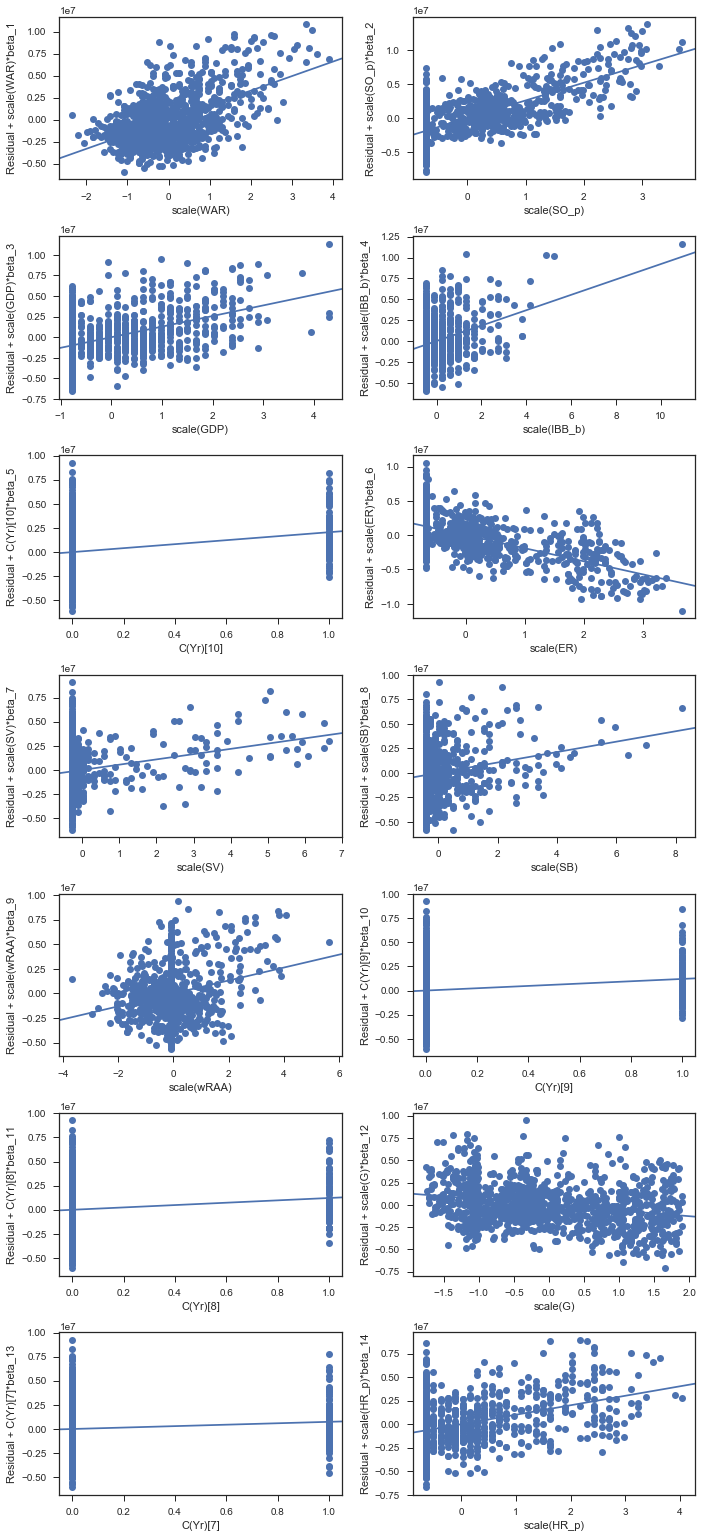

In [80]:
fig = plt.figure(figsize=(10, 25))
sm.graphics.plot_ccpr_grid(result4_idx_elimVer_filt, fig=fig)
fig.suptitle("")
plt.show()

## * Trying to another OLS Modeling

## 1. Numeric Variables ONLY

In [48]:
converted_num_ols = " + ".join(num_cols_list)

num_ols_model = model_str + converted_num_ols
num_ols_model

'Salary ~ scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP)'

### * 5th OLS analysis

In [49]:
model5 = sm.OLS.from_formula(num_ols_model, df)
result5 = model5.fit()
print(result5.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     35.19
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          1.04e-229
Time:                        01:25:50   Log-Likelihood:                -19963.
No. Observations:                1225   AIC:                         4.006e+04
Df Residuals:                    1158   BIC:                         4.040e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.817e+06    

## * 1st Filtrating P-VALUE under 5% of 5th OLS model

In [50]:
dfX5 = dmatrix(converted_num_ols, data=df_x)
dfX_columns5 = dfX5.design_info.column_names
dfX5 = pd.DataFrame(dfX5, columns=dfX_columns5)

In [51]:
p_values5 = extracted_pvals(result5, 0.05)

extracted_features5 = list(p_values5.index.values)
extracted_df_x5 = dfX5.loc[:, extracted_features5]

print(extracted_df_x5.shape)
extracted_df_x5.tail()

(1225, 21)


,Intercept,scale(wRAA),scale(G),scale(SV),scale(GDP),scale(SO_p),scale(SB),scale(WAR),scale(wOBA),scale(IBB_b),scale(HR_p),scale(SLG),scale(BK),scale(OBP),scale(W),scale(IBB_p),scale(OPS),scale(K_Percent),scale(K_per_9),scale(BABIP_b),scale(BB_per_9)
1220,1.0,-0.318475,0.130796,-0.271484,1.153062,-0.715004,-0.269710,-1.008703,0.881984,-0.476154,-0.648139,0.993282,-0.299392,0.800426,-0.628874,-0.625037,0.912641,0.680057,-0.897374,0.861173,-0.850686
1221,1.0,-0.084996,-1.755004,-0.271484,-0.769897,-0.609591,-0.421406,-0.658062,-1.056148,-0.476154,-0.648139,-1.037828,-0.299392,-1.058482,-0.628874,-0.625037,-1.051964,-0.949117,1.241561,-1.059341,0.083349
1222,1.0,-0.040524,0.789689,-0.271484,0.104175,-0.715004,-0.118014,0.393864,0.931840,0.596068,-0.648139,1.007790,-0.299392,0.916991,-0.628874,-0.625037,0.972422,1.532096,-0.897374,1.219578,-0.850686
1223,1.0,1.994078,1.198658,-0.271484,2.201948,-0.715004,-0.421406,1.656174,1.193581,0.238661,-0.648139,1.360816,-0.299392,1.113311,-0.628874,-0.625037,1.257738,0.464706,-0.897374,1.151955,-0.850686
1224,1.0,2.449918,1.221379,-0.271484,1.677505,-0.715004,0.033683,1.515917,1.243437,2.383106,-0.648139,1.525240,-0.299392,1.113311,-0.628874,-0.625037,1.350126,0.914134,-0.897374,0.955846,-0.850686


### * 6th OLS analysis

In [52]:
dfX6 = sm.add_constant(extracted_df_x5)

model6 = sm.OLS(dfY, dfX6)
result6 = model6.fit()
print(result6.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     88.64
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          6.40e-220
Time:                        01:26:55   Log-Likelihood:                -20083.
No. Observations:                1225   AIC:                         4.021e+04
Df Residuals:                    1204   BIC:                         4.031e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.817e+06   9.19e+04  

## * 2nd Filtrating P-VALUE under 5% of 6th OLS model

In [53]:
p_values6 = extracted_pvals(result6, 0.05)

extracted_features6 = list(p_values6.index.values)
extracted_df_x6 = dfX6.loc[:, extracted_features6]

print(extracted_df_x6.shape)
extracted_df_x6.tail()

(1225, 17)


,Intercept,scale(GDP),scale(SO_p),scale(WAR),scale(SB),scale(wRAA),scale(SV),scale(IBB_p),scale(IBB_b),scale(HR_p),scale(BB_per_9),scale(K_Percent),scale(BABIP_b),scale(G),scale(SLG),scale(OBP),scale(OPS)
1220,1.0,1.153062,-0.715004,-1.008703,-0.269710,-0.318475,-0.271484,-0.625037,-0.476154,-0.648139,-0.850686,0.680057,0.861173,0.130796,0.993282,0.800426,0.912641
1221,1.0,-0.769897,-0.609591,-0.658062,-0.421406,-0.084996,-0.271484,-0.625037,-0.476154,-0.648139,0.083349,-0.949117,-1.059341,-1.755004,-1.037828,-1.058482,-1.051964
1222,1.0,0.104175,-0.715004,0.393864,-0.118014,-0.040524,-0.271484,-0.625037,0.596068,-0.648139,-0.850686,1.532096,1.219578,0.789689,1.007790,0.916991,0.972422
1223,1.0,2.201948,-0.715004,1.656174,-0.421406,1.994078,-0.271484,-0.625037,0.238661,-0.648139,-0.850686,0.464706,1.151955,1.198658,1.360816,1.113311,1.257738
1224,1.0,1.677505,-0.715004,1.515917,0.033683,2.449918,-0.271484,-0.625037,2.383106,-0.648139,-0.850686,0.914134,0.955846,1.221379,1.525240,1.113311,1.350126


### * 7th OLS analysis

In [54]:
dfX7 = sm.add_constant(extracted_df_x6)

model7 = sm.OLS(dfY, dfX7)
result7 = model7.fit()
print(result7.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     109.9
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          3.83e-222
Time:                        01:28:14   Log-Likelihood:                -20087.
No. Observations:                1225   AIC:                         4.021e+04
Df Residuals:                    1208   BIC:                         4.029e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.817e+06   9.21e+04  

## 2. Categorical Variable(Yr) and All Numeric Variables

In [55]:
yr_str = 'C(Yr) + '

cat_num_ols_list = model_str + yr_str + converted_num_ols + zero
cat_num_ols_list

'Salary ~ C(Yr) + scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP) + 0'

### * 8th OLS analysis

In [56]:
model8 = sm.OLS.from_formula(cat_num_ols_list, df)
result8 = model8.fit()
print(result8.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     32.76
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          7.43e-235
Time:                        01:29:02   Log-Likelihood:                -19931.
No. Observations:                1225   AIC:                         4.002e+04
Df Residuals:                    1148   BIC:                         4.041e+04
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(Yr)[0]             4.356e+06   3

## * 1st Filtrating P-VALUE under 5% of 8th OLS model

In [57]:
filtration_str_list = yr_str + converted_num_ols + zero

dfX8 = dmatrix(filtration_str_list, data=df_x)
dfX_columns8 = dfX8.design_info.column_names
dfX8 = pd.DataFrame(dfX8, columns=dfX_columns8)

In [61]:
p_values8 = extracted_pvals(result8, 0.05)

extracted_features8 = list(p_values8.index.values)
extracted_df_x8 = dfX8.loc[:, extracted_features8]

print(extracted_df_x8.shape)
extracted_df_x8.tail()

(1225, 21)


,C(Yr)[9],C(Yr)[10],C(Yr)[3],C(Yr)[7],C(Yr)[6],C(Yr)[8],C(Yr)[0],C(Yr)[1],C(Yr)[2],C(Yr)[4],C(Yr)[5],scale(G),scale(SV),scale(IBB_b),scale(GDP),scale(WAR),scale(SB),scale(wRAA),scale(SO_p),scale(HR_p),scale(SLG)
1220,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.130796,-0.271484,-0.476154,1.153062,-1.008703,-0.269710,-0.318475,-0.715004,-0.648139,0.993282
1221,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.755004,-0.271484,-0.476154,-0.769897,-0.658062,-0.421406,-0.084996,-0.609591,-0.648139,-1.037828
1222,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.789689,-0.271484,0.596068,0.104175,0.393864,-0.118014,-0.040524,-0.715004,-0.648139,1.007790
1223,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.198658,-0.271484,0.238661,2.201948,1.656174,-0.421406,1.994078,-0.715004,-0.648139,1.360816
1224,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.221379,-0.271484,2.383106,1.677505,1.515917,0.033683,2.449918,-0.715004,-0.648139,1.525240


### * 9th OLS analysis

In [62]:
dfX9 = sm.add_constant(extracted_df_x8)

model9 = sm.OLS(dfY, dfX9)
result9 = model9.fit()
print(result9.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     90.83
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          1.07e-223
Time:                        01:30:24   Log-Likelihood:                -20074.
No. Observations:                1225   AIC:                         4.019e+04
Df Residuals:                    1204   BIC:                         4.030e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.499e+06   8.65e+04     52.032   

## * 2nd Filtrating P-VALUE under 5% of 9th OLS model

In [63]:
p_values9 = extracted_pvals(result9, 0.05)

extracted_features9 = list(p_values9.index.values)
extracted_df_x9 = dfX9.loc[:, extracted_features9]

print(extracted_df_x9.shape)
extracted_df_x9.tail()

(1225, 16)


,const,scale(WAR),scale(SO_p),scale(GDP),scale(IBB_b),scale(SV),C(Yr)[10],C(Yr)[9],scale(SB),scale(wRAA),C(Yr)[8],C(Yr)[3],scale(G),C(Yr)[7],scale(HR_p),scale(SLG)
1220,1.0,-1.008703,-0.715004,1.153062,-0.476154,-0.271484,1.0,0.0,-0.269710,-0.318475,0.0,0.0,0.130796,0.0,-0.648139,0.993282
1221,1.0,-0.658062,-0.609591,-0.769897,-0.476154,-0.271484,1.0,0.0,-0.421406,-0.084996,0.0,0.0,-1.755004,0.0,-0.648139,-1.037828
1222,1.0,0.393864,-0.715004,0.104175,0.596068,-0.271484,1.0,0.0,-0.118014,-0.040524,0.0,0.0,0.789689,0.0,-0.648139,1.007790
1223,1.0,1.656174,-0.715004,2.201948,0.238661,-0.271484,1.0,0.0,-0.421406,1.994078,0.0,0.0,1.198658,0.0,-0.648139,1.360816
1224,1.0,1.515917,-0.715004,1.677505,2.383106,-0.271484,1.0,0.0,0.033683,2.449918,0.0,0.0,1.221379,0.0,-0.648139,1.525240


### * 10th OLS analysis

In [64]:
dfX10 = sm.add_constant(extracted_df_x9)

model10 = sm.OLS(dfY, dfX10)
result10 = model10.fit()
print(result10.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     120.4
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          2.84e-227
Time:                        01:31:41   Log-Likelihood:                -20077.
No. Observations:                1225   AIC:                         4.019e+04
Df Residuals:                    1209   BIC:                         4.027e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.438e+06   1.34e+05     33.105   

## Eliminating Outliers of 10th OLS analysis RESULT

In [86]:
def elim_outliers(result):
    influence = result.get_influence()
    cooks_d2, pvals = influence.cooks_distance
    fox_cr = 4 / (len(dfY) - len(dfX10.columns) - 1)
    idx10 = np.where(cooks_d2 > fox_cr)[0]
    
    return idx10

In [87]:
idx10 = elim_outliers(result10)
print(idx10, '\n')
print("There are '{}' Outliers according to Fox criteria".format(len(idx)))

[   7   13   19   41   66   72   95  113  119  137  144  157  187  202  207
  248  252  259  260  270  272  304  391  393  397  401  405  411  416  438
  457  460  462  499  507  539  549  571  591  605  737  747  753  766  782
  791  800  801  802  804  814  826  837  893  903  914  923  926  958  961
  976  983  993 1000 1007 1017 1020 1036 1049 1059 1073 1077 1088 1091 1096
 1106 1135 1156 1164 1169 1171 1183 1188 1199 1202 1209 1223 1224] 

There are '92' Outliers according to Fox criteria


In [88]:
dfX10_idx = dfX10.drop(idx10)
dfY_idx10 = dfY.drop(idx10)

### * 10-1 OLS analysis

In [89]:
dfX10_idx_elimVer = sm.add_constant(dfX10_idx)
model10_idx_elimVer = sm.OLS(dfY_idx10, dfX10_idx_elimVer)
result10_idx_elimVer = model10_idx_elimVer.fit()
print(result10_idx_elimVer.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     114.5
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          1.19e-213
Time:                        02:47:32   Log-Likelihood:                -18314.
No. Observations:                1137   AIC:                         3.666e+04
Df Residuals:                    1121   BIC:                         3.674e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.234e+06   1.04e+05     40.595   

## 3. Categorical Variable(Team) and All Numeric Variables

In [65]:
team_str = 'C(Team) + '

cat_num_ols_list2 = model_str + team_str + converted_num_ols + zero
cat_num_ols_list2

'Salary ~ C(Team) + scale(G) + scale(AB) + scale(PA) + scale(H_b) + scale(Hits) + scale(Doubles) + scale(Triples) + scale(HR_b) + scale(R_b) + scale(RBI) + scale(BB_b) + scale(IBB_b) + scale(SO_b) + scale(BB_Percent) + scale(K_Percent) + scale(BB_per_K) + scale(BABIP_b) + scale(HBP_b) + scale(SF) + scale(SH) + scale(GDP) + scale(SB) + scale(CS) + scale(Def) + scale(ISO) + scale(wOBA) + scale(wRAA) + scale(AVG) + scale(OBP) + scale(SLG) + scale(OPS) + scale(WAR) + scale(wRC_Plus) + scale(WPA) + scale(W) + scale(L) + scale(GS) + scale(CG) + scale(IP) + scale(H_p) + scale(HR_p) + scale(BB_p) + scale(SO_p) + scale(R_p) + scale(SV) + scale(BS) + scale(BK) + scale(ER) + scale(HBP_p) + scale(HLD) + scale(IBB_p) + scale(ShO) + scale(TBF) + scale(WP) + scale(HR_per_9) + scale(BB_per_9) + scale(K_per_9) + scale(K_per_BB) + scale(K_BB_Percent) + scale(GB_Percent) + scale(HR_per_FB) + scale(LOB_Percent) + scale(ERA) + scale(BABIP_p) + scale(FIP) + scale(WHIP) + 0'

### * 11th OLS analysis

In [66]:
model11 = sm.OLS.from_formula(cat_num_ols_list2, df)
result11 = model11.fit()
print(result11.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     24.50
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          5.29e-215
Time:                        01:33:54   Log-Likelihood:                -19942.
No. Observations:                1225   AIC:                         4.008e+04
Df Residuals:                    1127   BIC:                         4.058e+04
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(Team)[0]           7.098e+06   3

## * 1st Filtrating P-VALUE under 5% of 11th OLS model

In [67]:
filtration_str_list2 = team_str + converted_num_ols + zero

dfX11 = dmatrix(filtration_str_list2, data=df_x)
dfX_columns11 = dfX11.design_info.column_names
dfX11 = pd.DataFrame(dfX11, columns=dfX_columns11)

In [70]:
p_values11 = extracted_pvals(result11, 0.05)

extracted_features11 = list(p_values11.index.values)
extracted_df_x11 = dfX11.loc[:, extracted_features11]

print(extracted_df_x11.shape)
extracted_df_x11.tail()

(1225, 41)


,C(Team)[11],C(Team)[31],C(Team)[24],C(Team)[4],C(Team)[7],C(Team)[22],C(Team)[28],C(Team)[20],C(Team)[8],C(Team)[12],C(Team)[27],C(Team)[17],C(Team)[16],C(Team)[21],C(Team)[30],C(Team)[29],C(Team)[18],C(Team)[14],C(Team)[5],C(Team)[1],C(Team)[2],C(Team)[6],C(Team)[19],C(Team)[3],C(Team)[26],C(Team)[25],C(Team)[23],C(Team)[10],C(Team)[13],C(Team)[15],scale(wRAA),scale(G),scale(SV),scale(GDP),scale(SB),scale(SO_p),scale(wOBA),C(Team)[9],scale(WAR),scale(IBB_b),scale(HR_p)
1220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.318475,0.130796,-0.271484,1.153062,-0.269710,-0.715004,0.881984,0.0,-1.008703,-0.476154,-0.648139
1221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.084996,-1.755004,-0.271484,-0.769897,-0.421406,-0.609591,-1.056148,0.0,-0.658062,-0.476154,-0.648139
1222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.040524,0.789689,-0.271484,0.104175,-0.118014,-0.715004,0.931840,0.0,0.393864,0.596068,-0.648139
1223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.994078,1.198658,-0.271484,2.201948,-0.421406,-0.715004,1.193581,0.0,1.656174,0.238661,-0.648139
1224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.449918,1.221379,-0.271484,1.677505,0.033683,-0.715004,1.243437,0.0,1.515917,2.383106,-0.648139


### * 12th OLS analysis

In [71]:
dfX12 = sm.add_constant(extracted_df_x11)

model12 = sm.OLS(dfY, dfX12)
result12 = model12.fit()
print(result12.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     41.24
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          9.49e-197
Time:                        01:40:01   Log-Likelihood:                -20093.
No. Observations:                1225   AIC:                         4.027e+04
Df Residuals:                    1183   BIC:                         4.049e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         9.958e+06   3.28e+06      3.034   

## * 2nd Filtrating P-VALUE under 5% of 12th OLS model

In [75]:
p_values12 = extracted_pvals(result12, 0.05)

extracted_features12 = list(p_values12.index.values)
extracted_df_x12 = dfX12.loc[:, extracted_features12]

print(extracted_df_x12.shape)
extracted_df_x12.tail()

,P_values
scale(SO_p),1.187101e-23
scale(WAR),1.650239e-17
scale(GDP),2.425734e-15
scale(IBB_b),1.084406e-12
scale(wRAA),1.671664e-11
scale(SV),1.961519e-10
scale(SB),4.704523e-09
scale(G),6.808127e-04
scale(HR_p),1.192318e-03
const,2.463526e-03


### * 13th OLS analysis

In [74]:
dfX13 = sm.add_constant(extracted_df_x12)

model13 = sm.OLS(dfY, dfX13)
result13 = model13.fit()
print(result13.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     176.4
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          2.05e-213
Time:                        01:41:15   Log-Likelihood:                -20125.
No. Observations:                1225   AIC:                         4.027e+04
Df Residuals:                    1215   BIC:                         4.032e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
scale(SO_p)   2.593e+06   2.56e+05     10.146   

**
※ In total(1.Numeric variables ONLY, 2.One categorical variable(Yr) + Numeric variables + ZERO, and 3.The other categorical variable(Team) and Numeric variables + ZERO), 10th OLS analysis(filtrating 5% P-VALUE about OLS modeling of the Categorical variable(Yr) and all numeric variables) or 10-1 OLS analysis(Outliers Elimination Ver. of 10th) showed the best results for the total number of remaining variables and the performance of the variables. **

** But, Overall, the 'R-squared' SCORE of newly tried Models is generally lower than 4-1 OLS model.(Two Categorical Variables + Numeric Variables + ZERO)**

=======================================================================================

# * Deviding Batters and Pitchers to analyze the data in more detail

### - thus, Start again with Devided Data

In [92]:
bat_df = pd.read_csv('../dataset/mlb_fa_bat_list2.csv')
pit_df = pd.read_csv('../dataset/mlb_fa_pit_list2.csv')